<a href="https://colab.research.google.com/github/mintseok/mnist_skku/blob/main/sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://ghqls0210.tistory.com/126?category=836308

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
Mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = Mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


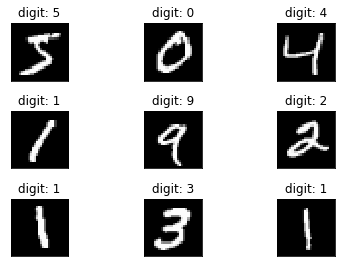

In [4]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28,28), cmap="gray", interpolation="none")
  plt.title("digit: {}".format(t_train[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

In [5]:
x_train.astype('float32')
x_test.astype('float32')
x_train, x_test = x_train/255, x_test/255
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(t_train.shape)

(60000, 28, 28, 1)
(60000,)


In [6]:
num_category = 10
t_train = tf.keras.utils.to_categorical(t_train, num_category)
t_test = tf.keras.utils.to_categorical(t_test, num_category)
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(28,28,1)),
              tf.keras.layers.MaxPool2D(2),
              tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
              tf.keras.layers.MaxPool2D(2),
              tf.keras.layers.Dropout(0.25),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(64, activation="relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(num_category, activation="softmax")
])
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [9]:
batch_size = 128
num_epoch = 10
History = model.fit(x_train, t_train, 
	batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, t_test))

Epoch 1/10
469/469 [==============================] - 16s 10ms/step - loss: 1.5811 - accuracy: 0.4846 - val_loss: 0.5146 - val_accuracy: 0.8763
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6604 - accuracy: 0.7932 - val_loss: 0.2895 - val_accuracy: 0.9218
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4720 - accuracy: 0.8543 - val_loss: 0.2110 - val_accuracy: 0.9401
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3764 - accuracy: 0.8861 - val_loss: 0.1642 - val_accuracy: 0.9515
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3156 - accuracy: 0.9053 - val_loss: 0.1369 - val_accuracy: 0.9582
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2752 - accuracy: 0.9186 - val_loss: 0.1192 - val_accuracy: 0.9617
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2474 - accuracy: 0.9271 - val_loss: 0.1080 - val_accuracy: 0.9657
Epoc

In [10]:
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss = ", score[0])
print("Test accuracy = ", score[1])

Test loss =  0.08419865369796753
Test accuracy =  0.9724000096321106


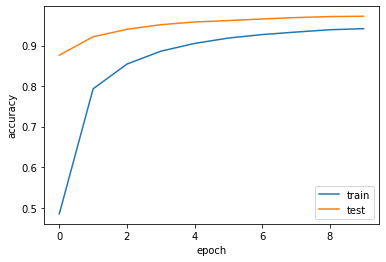

In [11]:
plt.plot(History.history['accuracy'], label="train")
plt.plot(History.history['val_accuracy'], label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

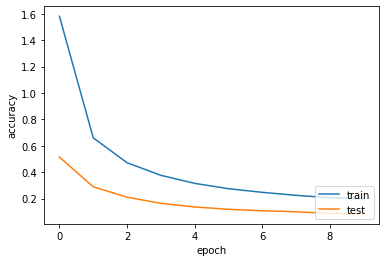

In [12]:
plt.plot(History.history['loss'], label="train")
plt.plot(History.history['val_loss'], label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()